In [2]:
#load the dataset from keras module
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


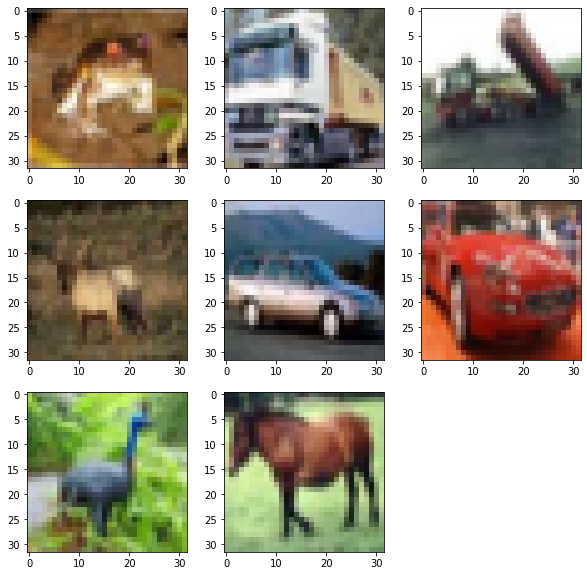

In [3]:
#visualize the dataset by plotting some image
n=8
plt.figure(figsize=(10,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_X[i])
plt.show()

In [5]:
#import required layers and modules to create CNN architecture
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [6]:
#Convert the pixel values of the dataset to float type and then normalize the dataset
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [7]:
#Now perform the one-hot encoding for target classes
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [8]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
sgd=SGD(learning_rate=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [11]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 234s 140ms/step - loss: 1.9203 - accuracy: 0.3009 - val_loss: 1.4100 - val_accuracy: 0.4952
Epoch 2/10
1563/1563 [==============================] - 225s 144ms/step - loss: 1.4126 - accuracy: 0.4919 - val_loss: 1.2251 - val_accuracy: 0.5624
Epoch 3/10
1563/1563 [==============================] - 226s 145ms/step - loss: 1.2445 - accuracy: 0.5536 - val_loss: 1.1488 - val_accuracy: 0.5897
Epoch 4/10
1563/1563 [==============================] - 228s 146ms/step - loss: 1.1166 - accuracy: 0.6030 - val_loss: 1.0777 - val_accuracy: 0.6152
Epoch 5/10
1563/1563 [==============================] - 229s 146ms/step - loss: 1.0206 - accuracy: 0.6346 - val_loss: 1.0223 - val_accuracy: 0.6388
Epoch 6/10
1563/1563 [==============================] - 229s 147ms/step - loss: 0.9375 - accuracy: 0.6685 - val_loss: 1.0198 - val_accuracy: 0.6410
Epoch 7/10
1563/1563 [==============================] - 230s 147ms/step - loss: 0.8677 - accuracy: 0.6940 - val_

In [12]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 9s 29ms/step - loss: 0.9346 - accuracy: 0.6774
67.739999294281


In [13]:
model.save("model1__cifar_10_epoch.h5")


In [23]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("./horse.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

7 horse


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


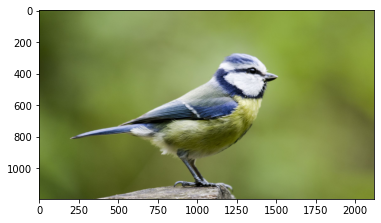

In [24]:
im1=Image.open("./sample image.jpg")
plt.imshow(im1)

In [25]:
im1=im1.resize((32,32))
im1=np.expand_dims(im1,axis=0)
im1=np.array(im1)
pred=model.predict_classes([im1])[0]
print(pred,results[pred])

2 bird


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


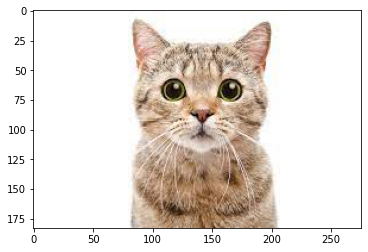

In [29]:
im2=Image.open("./sample image 2.jfif")
plt.imshow(im2)

In [30]:
im2=im2.resize((32,32))
im2=np.expand_dims(im2,axis=0)
im2=np.array(im2)
pred=model.predict_classes([im2])[0]
print(pred,results[pred])

3 cat


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


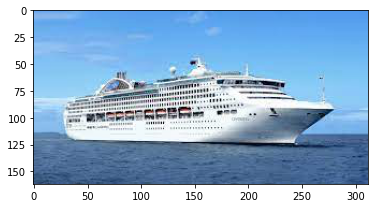

In [31]:
im3=Image.open("./sample image 3.jfif")
plt.imshow(im3)

In [32]:
im3=im3.resize((32,32))
im3=np.expand_dims(im3,axis=0)
im3=np.array(im3)
pred=model.predict_classes([im3])[0]
print(pred,results[pred])

8 ship


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


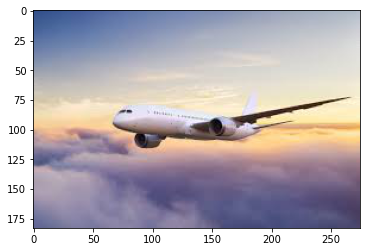

In [33]:
im4=Image.open("./sample image 4.jfif")
plt.imshow(im4)

In [34]:
im4=im4.resize((32,32))
im4=np.expand_dims(im4,axis=0)
im4=np.array(im4)
pred=model.predict_classes([im4])[0]
print(pred,results[pred])

0 aeroplane


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
